<a href="https://colab.research.google.com/github/astonmarcos/Marcos-Joao/blob/main/desafio_macroII_nxexpoliq_vs_ypib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exportações líquidas x nível de atividade(PIB)


In [155]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
def sgs(codigo):
  url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
  dt = pd.read_json(url, orient= 'records')
  dt.index = pd.to_datetime(dt['data'])
  dt = pd.DataFrame(dt['valor'])
  return dt

In [157]:
pib = sgs(1207)

In [158]:
exportacoes= sgs(22711)

In [159]:
importacoes= sgs(22712)

In [160]:
cambio = sgs(1)

In [161]:
importacoes = importacoes.groupby(importacoes.index.year).apply(lambda x: x.sum())

In [162]:
exportacoes = exportacoes.groupby(exportacoes.index.year).apply(lambda x: x.sum())

In [163]:
exportacoes = exportacoes.query("index < 2020")
exportacoes.tail()

,valor
data,
2015,187487.6
2016,181262.8
2017,215097.5
2018,236620.1
2019,222102.4


In [164]:
importacoes = importacoes.query("index < 2020")
importacoes.head()

,valor
data,
1995,50987.1
1996,54347.4
1997,60537.8
1998,58672.9
1999,50259.5


In [165]:
cambio = cambio.query("index >=1995 & index < 2020")

In [166]:
cambio = cambio.groupby(cambio.index.year).apply(lambda x: x.mean())

In [167]:
cambio.head

<bound method NDFrame.head of          valor
data          
1995  0.917748
1996  1.005229
1997  1.078661
1998  1.161066
1999  1.815768
2000  1.829499
2001  2.352216
2002  2.930936
2003  3.071526
2004  2.925727
2005  2.434087
2006  2.177107
2007  1.948308
2008  1.837467
2009  1.993549
2010  1.759307
2011  1.674634
2012  1.954992
2013  2.160508
2014  2.354716
2015  3.338696
2016  3.483327
2017  3.192545
2018  3.655784
2019  3.946119>

In [168]:
pib =  pib.query("index >=1995 & index < 2020")
pib.tail

<bound method NDFrame.tail of                    valor
data                    
1995-01-01  7.059916e+11
1996-01-01  8.547636e+11
1997-01-01  9.520892e+11
1998-01-01  1.002351e+12
1999-01-01  1.087710e+12
2000-01-01  1.199092e+12
2001-01-01  1.315755e+12
2002-01-01  1.488787e+12
2003-01-01  1.717950e+12
2004-01-01  1.957751e+12
2005-01-01  2.170585e+12
2006-01-01  2.409450e+12
2007-01-01  2.720263e+12
2008-01-01  3.109803e+12
2009-01-01  3.333039e+12
2010-01-01  3.885847e+12
2011-01-01  4.376382e+12
2012-01-01  4.814760e+12
2013-01-01  5.331619e+12
2014-01-01  5.778953e+12
2015-01-01  5.995787e+12
2016-01-01  6.269328e+12
2017-01-01  6.585479e+12
2018-01-01  7.004141e+12
2019-01-01  7.407024e+12>

In [169]:
exports =  exportacoes*cambio

In [170]:
imports = importacoes*cambio

In [171]:
balance = exports - imports

In [172]:
balance.head

<bound method NDFrame.head of               valor
data               
1995   -4112.336941
1996   -6635.413277
1997   -8187.253566
1998   -8820.036832
1999   -4832.304443
2000   -3967.817865
2001    2878.171987
2002   34194.052957
2003   71692.183243
2004   93932.792667
2005  105984.783674
2006   96922.201303
2007   73430.934121
2008   40497.596049
2009   45405.076579
2010   28960.483139
2011   42071.669125
2012   27675.643560
2013   -5163.396898
2014  -21541.411176
2015   50153.223573
2016  144708.554033
2017  173757.794189
2018  147980.668835
2019   90208.665284>

In [173]:
balance.dtypes

valor    float64
dtype: object

In [174]:
pib.dtypes

valor    float64
dtype: object

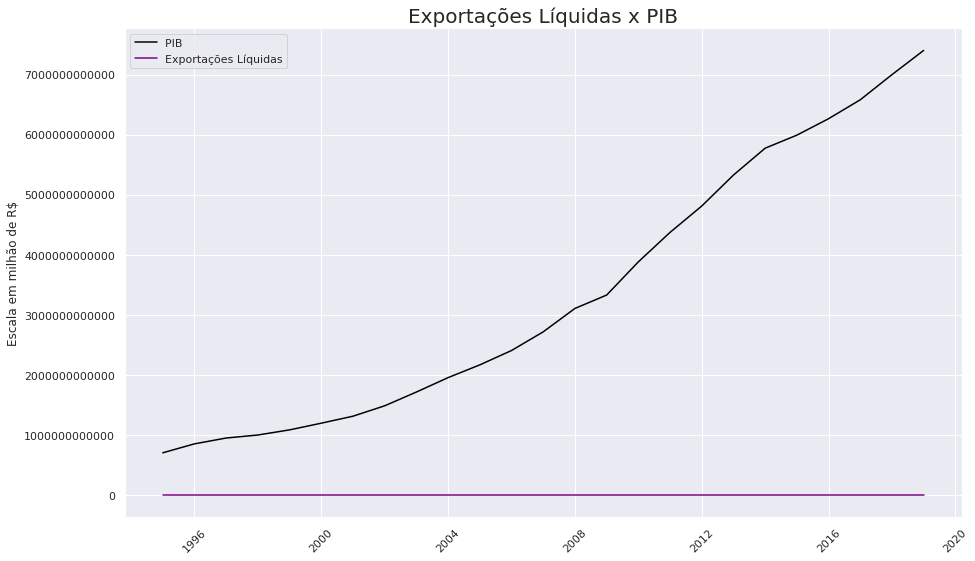

In [175]:
plt.figure(figsize=(15,9))

plt.plot(pib.index,pib.valor, label = 'PIB ', c="black")
plt.plot(pib.index,balance.valor, label = 'Exportações Líquidas', c="purple")
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Exportações Líquidas x PIB',fontdict={'fontsize':20})
plt.ylabel('Escala em milhão de R$',fontdict={'fontsize':12})
plt.xticks(rotation=45);